In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Display settings
pd.set_option("display.max_columns", None)


In [3]:
tweets = pd.read_csv("datas/tweets.csv")
messages_test = pd.read_csv("datas/disaster_response_messages_test.csv", low_memory=False)
messages_train = pd.read_csv("datas/disaster_response_messages_training.csv", low_memory=False)
messages_validation = pd.read_csv("datas/disaster_response_messages_validation.csv", low_memory=False)
natural = pd.read_csv("datas/Natural_disasters.csv")
disaster = pd.read_csv("datas/disaster.csv", encoding="latin-1")  # or encoding="ISO-8859-1"


In [4]:
print("Tweets dataset:")
print(tweets.info(), "\n")


Tweets dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ KB
None 



In [5]:
print("Messages (train):")
print(messages_train.info(), "\n")


Messages (train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21046 entries, 0 to 21045
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      21046 non-null  int64 
 1   split                   21046 non-null  object
 2   message                 21046 non-null  object
 3   original                8191 non-null   object
 4   genre                   21046 non-null  object
 5   related                 21046 non-null  int64 
 6   PII                     21046 non-null  int64 
 7   request                 21046 non-null  int64 
 8   offer                   21046 non-null  int64 
 9   aid_related             21046 non-null  int64 
 10  medical_help            21046 non-null  int64 
 11  medical_products        21046 non-null  int64 
 12  search_and_rescue       21046 non-null  int64 
 13  security                21046 non-null  int64 
 14  military                21046 non-nu

In [6]:
print("Natural disasters:")
print(natural.info(), "\n")


Natural disasters:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Disaster               12 non-null     object
 1   Total_n_of_events      12 non-null     int64 
 2   Total_n_of_death       12 non-null     int64 
 3   no_of_people_affected  12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes
None 



In [7]:
print("Disaster dataset:")
print(disaster.info(), "\n")



Disaster dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     15784 non-null  object 
 1   Historic                                   15784 non-null  object 
 2   Classification Key                         15784 non-null  object 
 3   Disaster Group                             15784 non-null  object 
 4   Disaster Subgroup                          15784 non-null  object 
 5   Disaster Type                              15784 non-null  object 
 6   Disaster Subtype                           15784 non-null  object 
 7   External IDs                               2405 non-null   object 
 8   Event Name                                 4955 non-null   object 
 9   ISO                                        15784 non-null  object 
 10  Coun

In [8]:
print("Tweets sample:\n", tweets.head(), "\n")
print("Messages train sample:\n", messages_train.head(), "\n")
print("Natural disasters sample:\n", natural.head(), "\n")
print("Disaster sample:\n", disaster.head(), "\n")


Tweets sample:
    id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0   

Messages train sample:
    id  split                                            message  \
0   2  train  Weather update - a cold front from Cuba that c...   
1   7  train            Is the Hurricane over or is it not over   
2  12  train  says: west side of Haiti, rest of the country ...   
3  14  train             Information about the National Palace-   
4  15  train                     Storm at sacr

In [9]:
# Check for missing values
print("Missing values in tweets:\n", tweets.isnull().sum(), "\n")
print("Missing values in messages_train:\n", messages_train.isnull().sum(), "\n")
print("Missing values in natural:\n", natural.isnull().sum(), "\n")
print("Missing values in disaster:\n", disaster.isnull().sum(), "\n")

Missing values in tweets:
 id             0
keyword        0
location    3418
text           0
target         0
dtype: int64 

Missing values in messages_train:
 id                            0
split                         0
message                       0
original                  12855
genre                         0
related                       0
PII                           0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transp

In [10]:
# Remove duplicates (if any)
tweets.drop_duplicates(inplace=True)
messages_train.drop_duplicates(inplace=True)
natural.drop_duplicates(inplace=True)
disaster.drop_duplicates(inplace=True)

In [12]:
# Handle missing values (example: fill with placeholder or drop)
tweets.fillna("Unknown", inplace=True)
messages_train.fillna("Unknown", inplace=True)
natural.fillna("Unknown", inplace=True)
# Fill numeric columns with 0
disaster.fillna({col: 0 for col in disaster.select_dtypes(include=['float64', 'int64']).columns}, inplace=True)

# Fill object (text) columns with "Unknown"
disaster.fillna({col: "Unknown" for col in disaster.select_dtypes(include=['object']).columns}, inplace=True)


In [13]:
print("✅ Data preprocessing completed")

✅ Data preprocessing completed


In [14]:
print(disaster.duplicated().sum())
disaster.drop_duplicates(inplace=True)


0


In [16]:
print(disaster.columns)  # See actual column names


Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


In [22]:
print(disaster['Disaster Group'].value_counts())


Disaster Group
Natural          10045
Technological     5739
Name: count, dtype: int64


In [23]:
print(disaster['Disaster Subgroup'].value_counts())


Disaster Subgroup
Hydrological              4531
Transport                 3912
Meteorological            3067
Biological                 924
Miscellaneous accident     924
Industrial accident        903
Geophysical                804
Climatological             718
Extra-terrestrial            1
Name: count, dtype: int64


In [24]:
print(disaster['Disaster Type'].value_counts())


Disaster Type
Flood                               4070
Storm                               2575
Road                                2124
Water                               1111
Epidemic                             894
Earthquake                           665
Extreme temperature                  492
Mass movement (wet)                  461
Explosion (Industrial)               458
Air                                  430
Fire (Miscellaneous)                 421
Drought                              408
Wildfire                             306
Rail                                 247
Miscellaneous accident (General)     186
Explosion (Miscellaneous)            159
Collapse (Miscellaneous)             158
Collapse (Industrial)                148
Volcanic activity                    126
Fire (Industrial)                    111
Industrial accident (General)        102
Gas leak                              34
Infestation                           29
Chemical spill                        23
Po

In [25]:
disaster['Start Date'] = pd.to_datetime(dict(year=disaster['Start Year'],
                                            month=disaster['Start Month'].fillna(1),
                                            day=disaster['Start Day'].fillna(1)),
                                        errors='coerce')

disaster['End Date'] = pd.to_datetime(dict(year=disaster['End Year'],
                                          month=disaster['End Month'].fillna(1),
                                          day=disaster['End Day'].fillna(1)),
                                      errors='coerce')


In [26]:
disaster['Duration'] = (disaster['End Date'] - disaster['Start Date']).dt.days


In [27]:
disaster['Year'] = disaster['Start Date'].dt.year


In [28]:
num_cols = ['Total Deaths', 'No. Injured', 'No. Affected', 
            'No. Homeless', 'Total Affected',
            "Total Damage ('000 US$)"]

disaster[num_cols] = disaster[num_cols].fillna(0)


In [30]:
disaster = pd.read_csv("datas/disaster.csv", encoding="latin-1")


In [31]:
print(disaster.head())
print(disaster.info())
print(disaster.shape)


          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype External IDs Event Name  ISO   Country  \
0       Drought          Drought          NaN        NaN  DJI  Djibouti   
1       Drought          Drought          NaN        NaN  SDN     Sudan   
2       Drought          Drought          NaN        NaN  SOM   Somalia   
3          Road             Road          NaN        NaN  AGO    Angola   
4         Flood   Riverine flood          NaN        NaN  AGO    Angola   

            Subregion  Region  \
0  Sub-Saharan Africa  Africa

In [32]:
print(disaster.isnull().sum())


DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

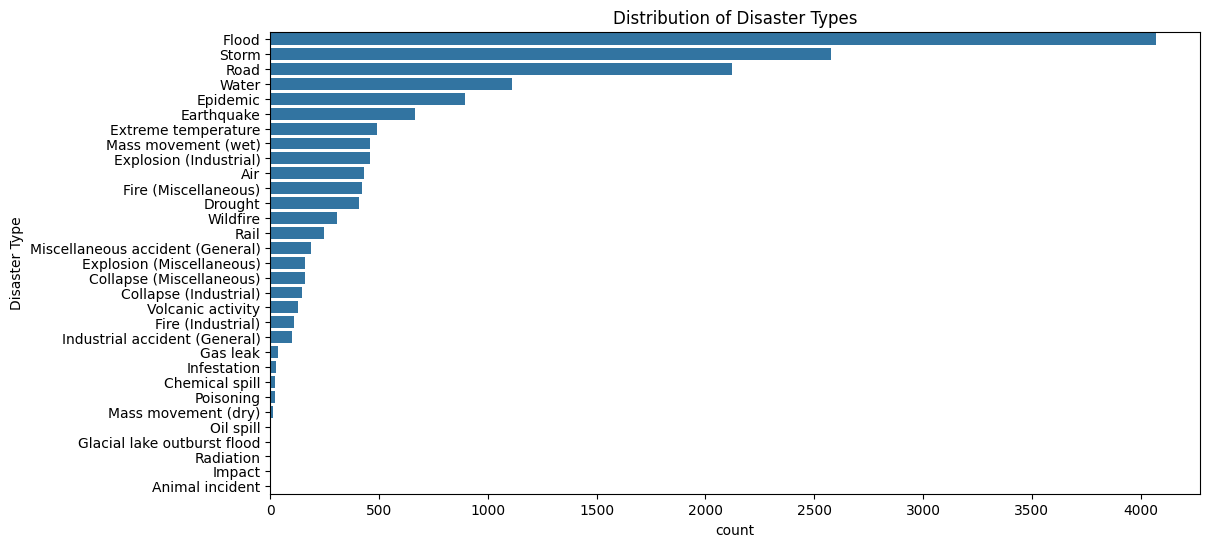

In [33]:
# Class distribution: Disaster Type
plt.figure(figsize=(12,6))
sns.countplot(y="Disaster Type", data=disaster, order=disaster["Disaster Type"].value_counts().index)
plt.title("Distribution of Disaster Types")
plt.show()

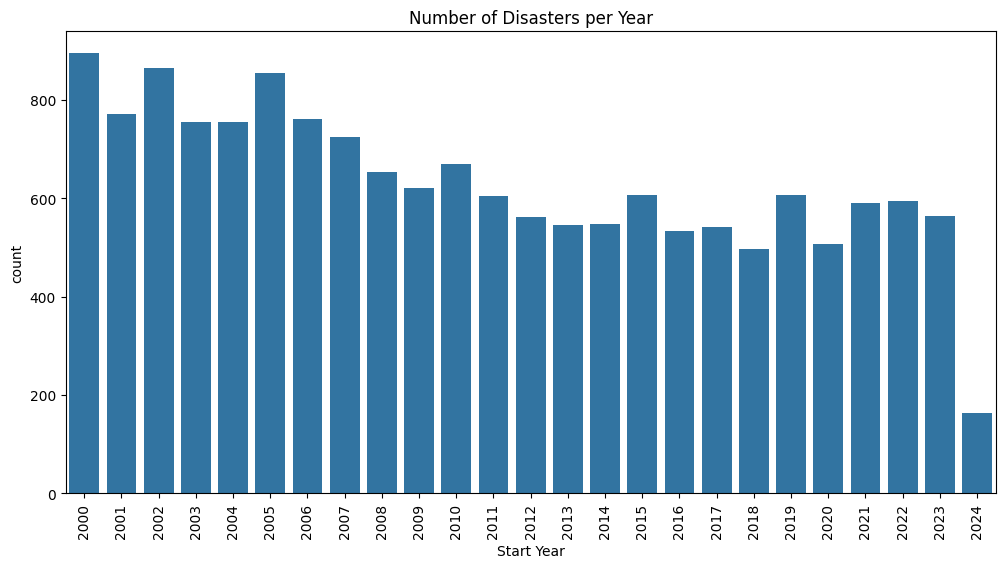

In [34]:
# Yearly trend of disasters
plt.figure(figsize=(12,6))
sns.countplot(x="Start Year", data=disaster, order=sorted(disaster["Start Year"].dropna().unique()))
plt.xticks(rotation=90)
plt.title("Number of Disasters per Year")
plt.show()

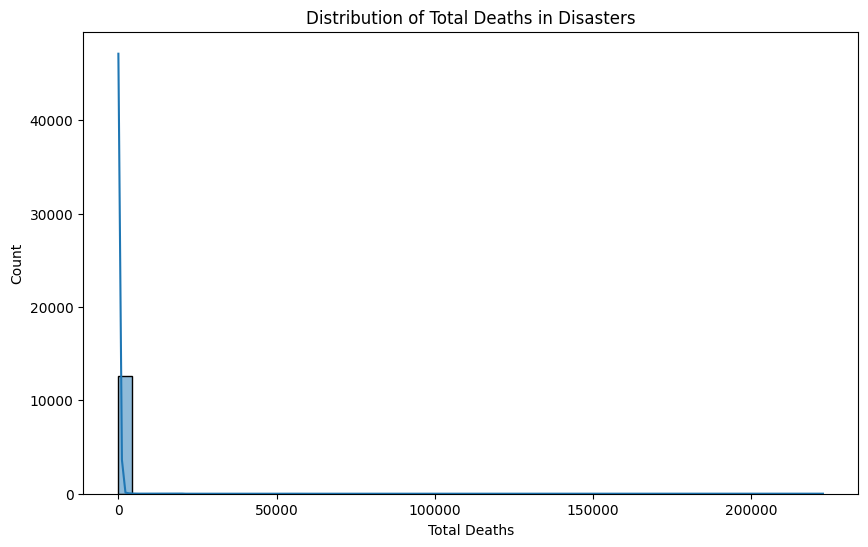

In [35]:
# Impact: Total Deaths distribution
plt.figure(figsize=(10,6))
sns.histplot(disaster["Total Deaths"].dropna(), bins=50, kde=True)
plt.title("Distribution of Total Deaths in Disasters")
plt.show()


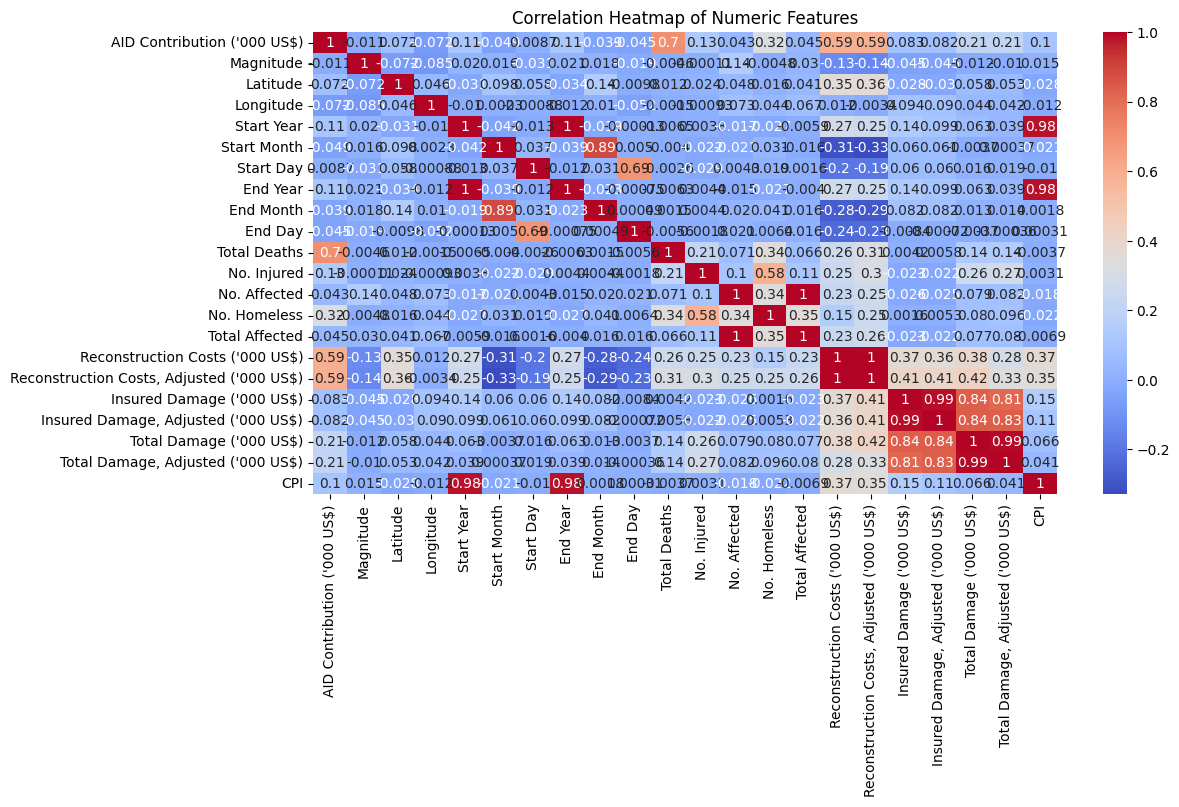

In [36]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(12,6))
sns.heatmap(disaster.select_dtypes("number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()